## Acquisition Analytics - Bank Marketing

- We have Portuguese bank dataset of campaign of term deposit for acquiring new customers using telemarketing and in which the response of customer is also provided.
- It is required to build a classification model using the data-set and find the most promising customers for acquisition and to contact only those customers who are likely to respond “yes” and hence reducing the cost of calls.

In [1]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.model_selection import train_test_split

In [2]:
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
# set the maximum rows,columns,width
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)

In [4]:
# import data-set to dataframe
loan = pd.read_csv(r"C:\Users\hp\Downloads\bank_marketing.csv")

#### Sanity test and pre-processing of dataframe

In [5]:
# Check first five rows of data-set
loan.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [6]:
# Check shape of Dataframe
rows,columns = loan.shape
print("Original Dataset")
print("Number of rows : ",rows)
print("Number of columns : ",columns)

Original Dataset
Number of rows :  41188
Number of columns :  21


We have 41188 rows and 21 features in the dataset

In [7]:
# Check the column names of dataframe
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'response'], dtype='object')

In [8]:
loan.columns.tolist()

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'response']

In [9]:
# Check the info of the dataframe to check the type of data and null objects
loan.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null object
dtypes: float64(5), int64(5), object(11)
memory usa

In [10]:
# Describe the dataframe for numerical columns
loan.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [11]:
# Check unique values in different columns in dataframe
loan.nunique()

age                 78
job                 12
marital              4
education            8
default              3
housing              3
loan                 3
contact              2
month               10
day_of_week          5
duration          1544
campaign            42
pdays               27
previous             8
poutcome             3
emp.var.rate        10
cons.price.idx      26
cons.conf.idx       26
euribor3m          316
nr.employed         11
response             2
dtype: int64

In [12]:
# To check null values in the columns
loan.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
response          0
dtype: int64

In [13]:
# To check the first five rows of dataset
loan.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [14]:
# Check the number of responses for "yes" and "no" in the data-set
loan['response'].value_counts()

no     36548
yes     4640
Name: response, dtype: int64

Here, we can see that there are approximately 85-85% "no" responses.

###### Converting the categorical values of reponse "yes" and "no" to numerical values "1" and "0"

In [15]:
loan['response'] = loan['response'].map({'yes': 1, 'no': 0})
loan['response'].head()

0    0
1    0
2    0
3    0
4    0
Name: response, dtype: int64

In [16]:
loan['response'].value_counts()

0    36548
1     4640
Name: response, dtype: int64

###### Copy the dataset into a dataframe, so that we can use it later if needed

In [17]:
loan_copy = loan

In [18]:
# Calculating the percentage of people reponnding "1" as response from in whole compaign
100*(loan['response'].sum()/len(loan.index)).round(4)

11.27

It is only 11.27% people who responded "yes" to the term loan

In [19]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null int64
previous          41188 non-null int64
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null int64
dtypes: float64(5), int64(6), object(10)
memory usag

###### Here in info(), we can see that there are no null element in the data-set and the columns are of different data-types

### Data Understanding and exploration

###### Adding the Categorical column anmes in the into the list 'cat_cols' for ploting graphs

In [20]:
cat_cols = []
for col in loan.select_dtypes(include = ['object']).columns:
    cat_cols.append(col)
cat_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

###### Adding the numerical column anmes in the into the list 'num_cols' for ploting graphs

In [21]:
num_cols = []
for col in loan.select_dtypes(include = ['int64','float64']).columns:
    num_cols.append(col)
num_cols

['age',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed',
 'response']

##### Vizualizing the category coloumns

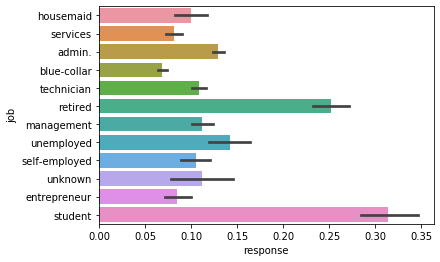

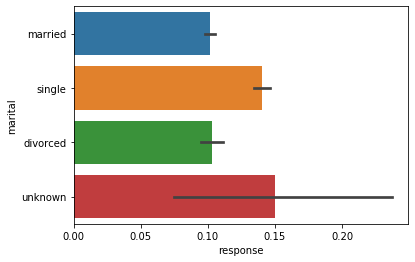

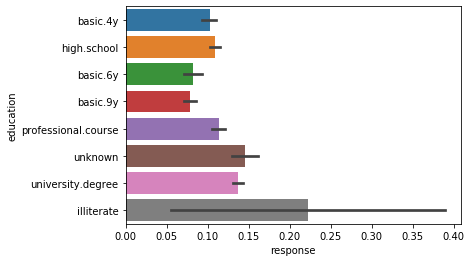

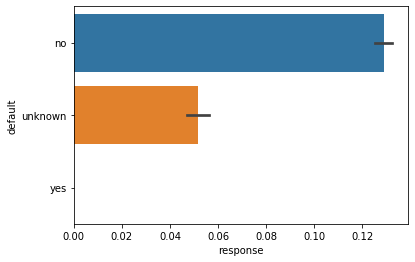

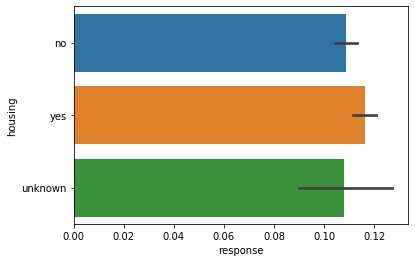

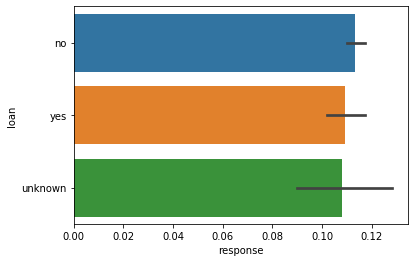

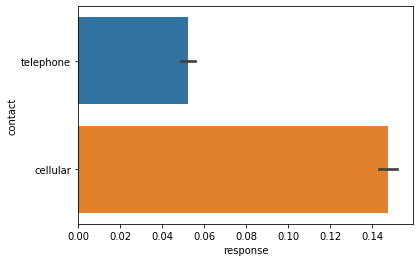

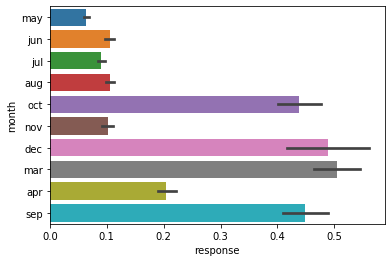

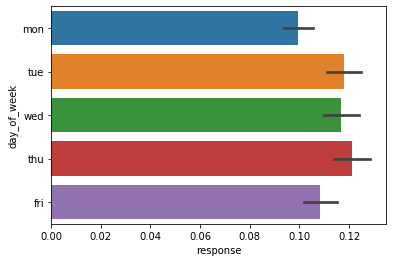

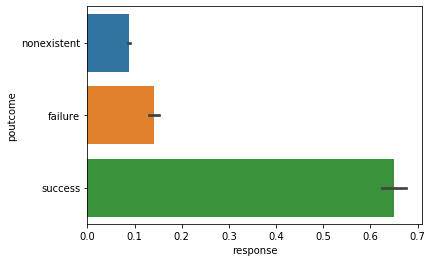

In [22]:
for i in loan[cat_cols]:
    sns.barplot(loan.response,loan[i])
    plt.show()

##### Visualizing the numerical columns

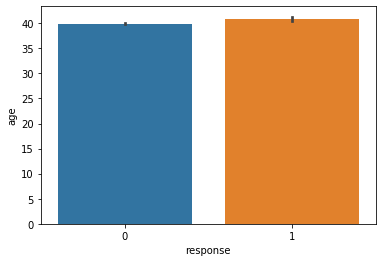

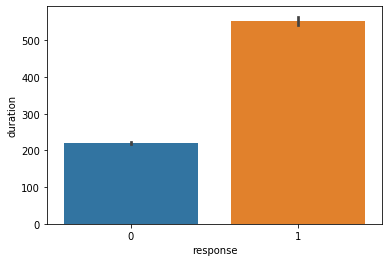

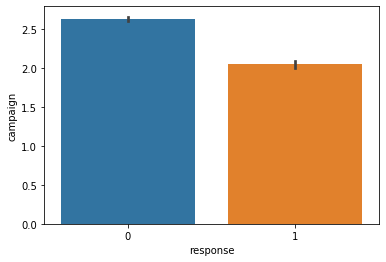

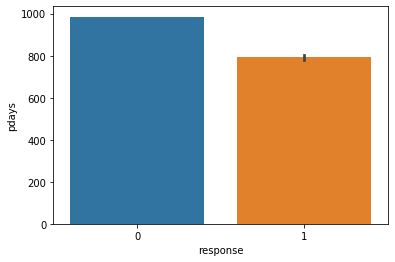

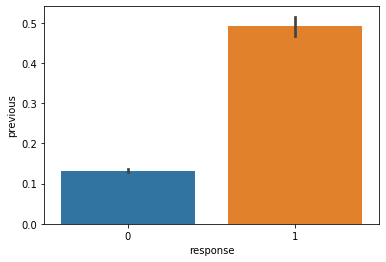

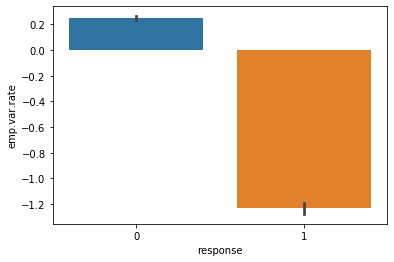

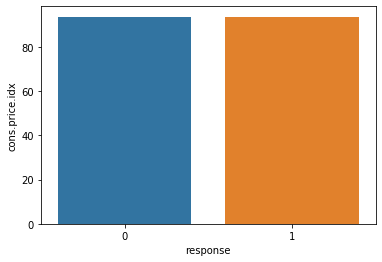

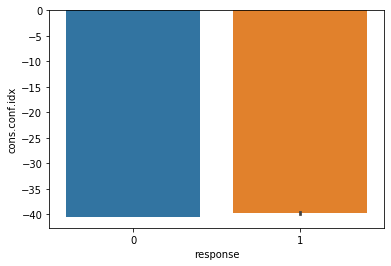

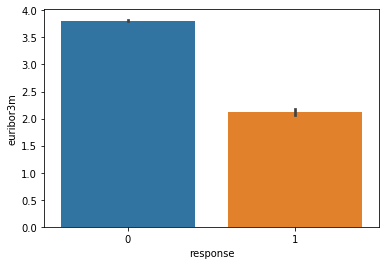

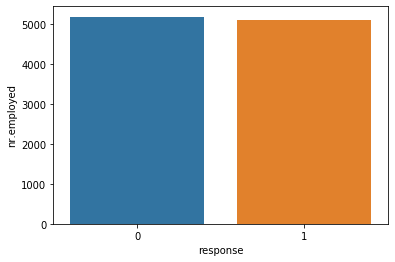

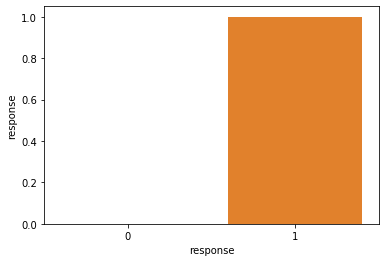

In [23]:
for i in loan[num_cols]:
    sns.barplot(loan.response,loan[i])
    plt.show()

##### Lets view the co-relation bewteen the category columns

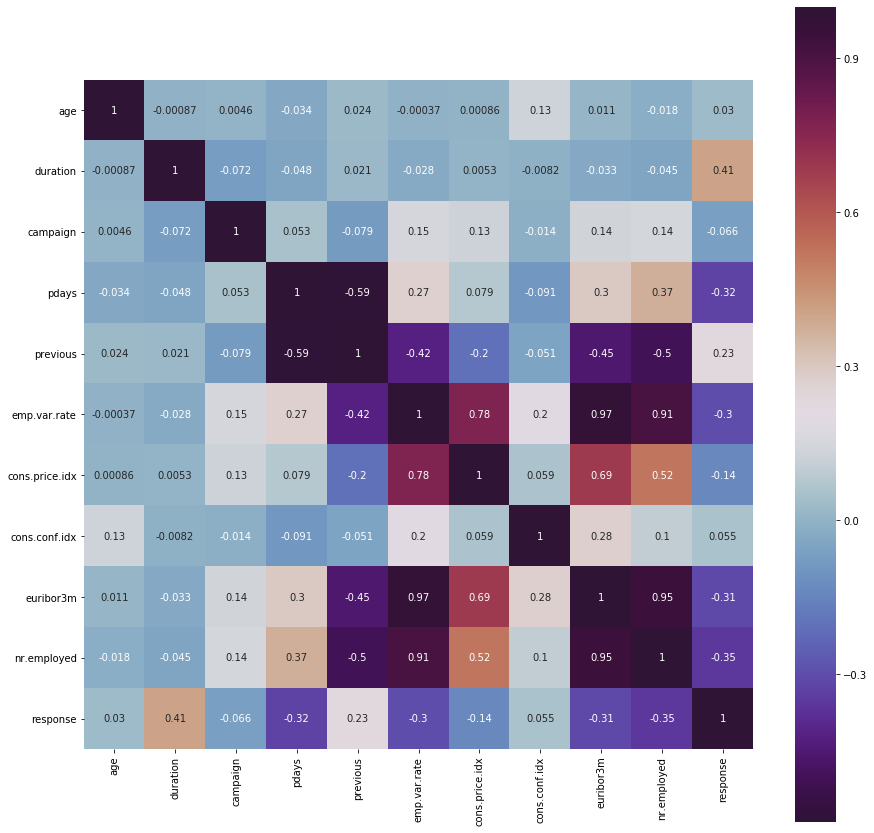

In [24]:
plt.figure(figsize=(15,15))
sns.heatmap(loan.corr(),square=True,annot=True,cmap= 'twilight_shifted')

###### From heat-map,we can see the columns which are highly co-related 

#### Lets view them one by one, firstly we will analyze the Customer basic information
- Age
- Job
- Marital Status
- Education
- Credit Card Default
- Housing loan
- Personal Loan

#### 1. Age

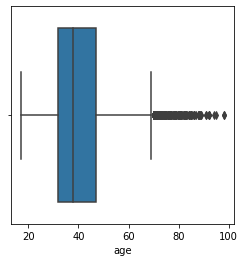

In [25]:
fig = plt.figure(figsize = (4,4))
plt.title= col
sns.boxplot(x='age', data=loan)
plt.show()

In [26]:
# We have few data outliers in age feature i.e. above 70 and we can change the outliers to 70 age and does not impact much

In [27]:
loan['age'][loan['age']>70] =70

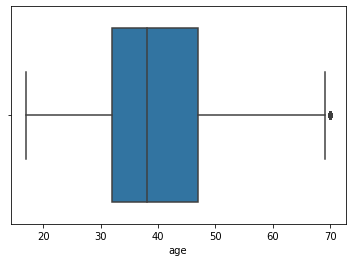

In [28]:
sns.boxplot(x='age', data=loan)
plt.show()

In [29]:
# For data exploration and understadning, we create bins of age group of 10 and see what is the response in different age groups

bins = np.arange(10,loan['age'].max() + 10, 10)
loan['age_bins'] = pd.cut(loan['age'], bins, include_lowest=True)

In [30]:
No_of_prospect = loan.groupby('age_bins')['response'].count().reset_index(name = 'No.of_prospect')
count_prospects = loan[loan['response']==1].groupby('age_bins')['response'].count().reset_index(name = 'count_prospects')

agg_age = No_of_prospect.merge(count_prospects, on='age_bins')
agg_age['response_rate'] = 100*(agg_age['count_prospects']/agg_age['No.of_prospect']).round(3)

agg_age

,age_bins,No.of_prospect,count_prospects,response_rate
0,"(9.999, 20.0]",140,57,40.7
1,"(20.0, 30.0]",7243,1067,14.7
2,"(30.0, 40.0]",16385,1597,9.7
3,"(40.0, 50.0]",10240,837,8.2
4,"(50.0, 60.0]",6270,668,10.7
5,"(60.0, 70.0]",910,414,45.5


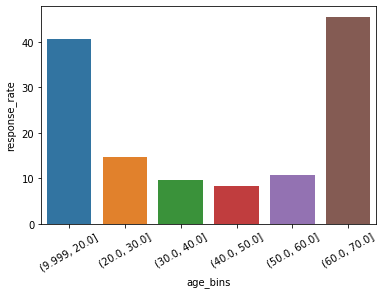

In [31]:
# plotting the response rate with age bins
ax = sns.barplot(x='age_bins', y='response_rate', data=agg_age)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

As we can see, the youngest and the eldest are the most likely to buy the investment product being offered by the bank.

In [32]:
# Note that we have added a new column named age bucket to the table
loan.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


Similarly, we will look at the relation between response rate and job. Note that since job is already a categorical variable, we don't need to bucket the data

#### 2. Job

In [33]:
loan['job'].value_counts()

admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [34]:
count_prospects_job = loan.groupby('job')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_job = loan.groupby('job')['response'].count().reset_index(name = 'No_of_prospects')

agg_job = count_prospects_job.merge(No_of_prospect_job, on = 'job')
agg_job['response_rate'] = 100*(agg_job['count_prospects']/agg_job['No_of_prospects']).round(4)

agg_job

,job,count_prospects,No_of_prospects,response_rate
0,admin.,1352,10422,12.97
1,blue-collar,638,9254,6.89
2,entrepreneur,124,1456,8.52
3,housemaid,106,1060,10.00
4,management,328,2924,11.22
5,retired,434,1720,25.23
6,self-employed,149,1421,10.49
7,services,323,3969,8.14
8,student,275,875,31.43
9,technician,730,6743,10.83


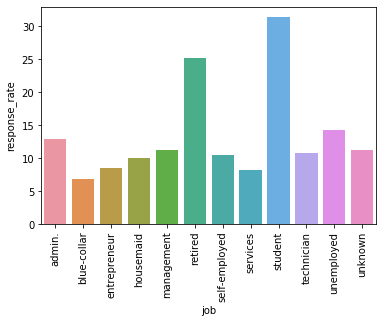

In [35]:
ax = sns.barplot(x='job', y='response_rate', data=agg_job)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

We can draw similarities from the age response analysis where we found that the youngest and eldest were most likely to respond in a positive manner. It is rreiterated by the above analysis, where we notice that student and retired have the highest response rates.

#### 3. Marital

In [36]:
loan['marital'].value_counts()

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64





Since there are 80 entries which list marital status as 'unknown', we will assign them to the biggest group, which is, 'married'.


In [37]:
loan.replace({'marital' : { 'unknown' : 'married'}}, inplace=True)

count_prospects_marital = loan.groupby('marital')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_job = loan.groupby('marital')['response'].count().reset_index(name = 'No_of_prospects')

agg_marital = count_prospects_marital.merge(No_of_prospect_job, on = 'marital')
agg_marital['response_rate'] = 100*(agg_marital['count_prospects']/agg_marital['No_of_prospects']).round(4)

agg_marital

,marital,count_prospects,No_of_prospects,response_rate
0,divorced,476,4612,10.32
1,married,2544,25008,10.17
2,single,1620,11568,14.00


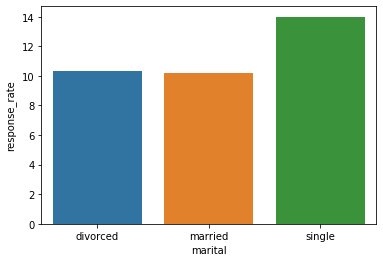

In [38]:
ax = sns.barplot(x='marital', y='response_rate', data=agg_marital)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You may note that there is a slight uptick in response rate for single customers, this can be attributed in part to the fact that people under the age of 20 have a very high response rate. 

#### 4. Education

In [39]:
loan['education'].value_counts()

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64





To simplify the problem, we are going to convert the educational qualifications to simple buckets of primary educations, secondary education, tertiary education and professional courses. Also note that there are 18 entries listing the educational status as illiterate. Since the closest group to them is primary education, we are going to assign all entries with educational status as illiterate to primary education.



In [40]:
loan.replace({'education' : { 'basic.9y' : 'Primary_Education', 'basic.4y' : 'Primary_Education','basic.6y' : 'Primary_Education','illiterate' : 'Primary_Education',
                             'high.school' : 'Secondary_Education', 'university.degree' : 'Tertiary_Education' }}, inplace=True)

loan['education'].value_counts()

Primary_Education      12531
Tertiary_Education     12168
Secondary_Education     9515
professional.course     5243
unknown                 1731
Name: education, dtype: int64

In [41]:
count_prospects_education = loan.groupby('education')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_education = loan.groupby('education')['response'].count().reset_index(name = 'No_of_prospects')

agg_education = count_prospects_education.merge(No_of_prospect_education, on = 'education')
agg_education['response_rate'] = 100*(agg_education['count_prospects']/agg_education['No_of_prospects']).round(4)

agg_education

,education,count_prospects,No_of_prospects,response_rate
0,Primary_Education,1093,12531,8.72
1,Secondary_Education,1031,9515,10.84
2,Tertiary_Education,1670,12168,13.72
3,professional.course,595,5243,11.35
4,unknown,251,1731,14.50


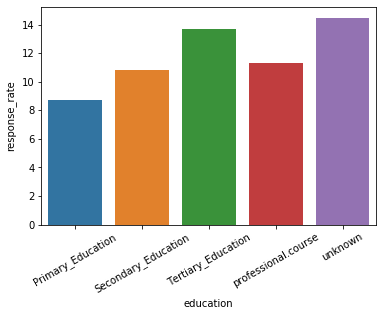

In [42]:
ax = sns.barplot(x='education', y='response_rate', data=agg_education)
ax.set_xticklabels(ax.get_xticklabels(),rotation=30)
plt.show()

You can note that the response rate is lowest for people with highest education qualification as primary education, which may be attributed, in part, to lack of awareness and a lack of trust between the bank and the customer. It is the highest for people with tertiary education.


#### 5. Previous Default

In [43]:
loan['default'].value_counts()

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

In [44]:
count_prospects_default = loan.groupby('default')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_default = loan.groupby('default')['response'].count().reset_index(name = 'No_of_prospects')

agg_default = count_prospects_default.merge(No_of_prospect_default, on = 'default')
agg_default['response_rate'] = 100*(agg_default['count_prospects']/agg_default['No_of_prospects']).round(4)

agg_default


,default,count_prospects,No_of_prospects,response_rate
0,no,4197,32588,12.88
1,unknown,443,8597,5.15
2,yes,0,3,0.00


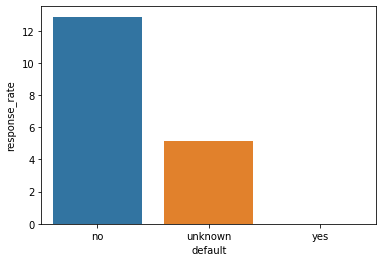

In [45]:
ax = sns.barplot(x='default', y='response_rate', data=agg_default)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### 6. Housing

In [46]:
loan['housing'].value_counts()

yes        21576
no         18622
unknown      990
Name: housing, dtype: int64

In [47]:
count_prospects_housing = loan.groupby('housing')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_housing = loan.groupby('housing')['response'].count().reset_index(name = 'No_of_prospects')

agg_housing = count_prospects_housing.merge(No_of_prospect_housing, on = 'housing')
agg_housing['response_rate'] = 100*(agg_housing['count_prospects']/agg_housing['No_of_prospects']).round(4)

agg_housing

,housing,count_prospects,No_of_prospects,response_rate
0,no,2026,18622,10.88
1,unknown,107,990,10.81
2,yes,2507,21576,11.62


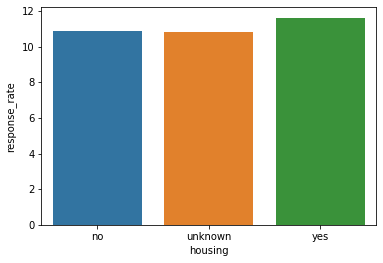

In [48]:
ax = sns.barplot(x='housing', y='response_rate', data=agg_housing)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that there is a slight uptick in the response rate for people with housing, though it is probably not very significant

#### 7. Loan

In [49]:
loan['loan'].value_counts()

no         33950
yes         6248
unknown      990
Name: loan, dtype: int64

In [50]:
count_prospects_loan = loan.groupby('loan')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_loan = loan.groupby('loan')['response'].count().reset_index(name = 'No_of_prospects')

agg_loan = count_prospects_loan.merge(No_of_prospect_loan, on = 'loan')
agg_loan['response_rate'] = 100*(agg_loan['count_prospects']/agg_loan['No_of_prospects']).round(4)
agg_loan


,loan,count_prospects,No_of_prospects,response_rate
0,no,3850,33950,11.34
1,unknown,107,990,10.81
2,yes,683,6248,10.93


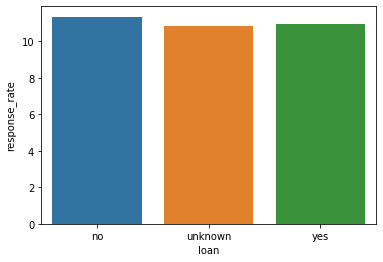

In [51]:
ax = sns.barplot(x='loan', y='response_rate', data=agg_loan)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

As you can see there seems to be very little correlation between a prospect having a personal loan and the likelihood of him/her responding positively to the investment product

#### Now, Check the last contact information
- Contact :Last Contact communication type
- Month : month of year the customer contacted
- Day_of_week: which day of week customer contacted
- Duration : This features describes the duration of call with the customer, but to build the model, we are going to discard this feature because the duration of call is known only when the customer is contacted and we are building a model in which customer is yet to be contacted 

#### 1. Contact

In [52]:
loan['contact'].value_counts()

cellular     26144
telephone    15044
Name: contact, dtype: int64

In [53]:
count_prospects_contact = loan.groupby('contact')['response'].sum().reset_index(name = 'count_prospects')
No_of_prospect_contact = loan.groupby('contact')['response'].count().reset_index(name = 'No_of_prospects')

agg_contact = count_prospects_contact.merge(No_of_prospect_contact, on = 'contact')
agg_contact['response_rate'] = 100*(agg_contact['count_prospects']/agg_contact['No_of_prospects']).round(4)

agg_contact

,contact,count_prospects,No_of_prospects,response_rate
0,cellular,3853,26144,14.74
1,telephone,787,15044,5.23


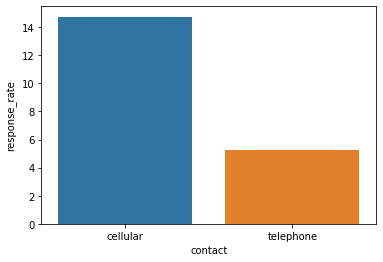

In [54]:
ax = sns.barplot(x='contact', y='response_rate', data=agg_contact)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can see that the prospective customers contacted through cellular medium are significantly ore likely to opt in to the investment scheme compared to customers contacted through telephonic medium.

#### 2. Month 

In [55]:
loan['month'].value_counts()

may    13769
jul     7174
aug     6178
jun     5318
nov     4101
apr     2632
oct      718
sep      570
mar      546
dec      182
Name: month, dtype: int64

In [56]:
count_prospects_month = loan.groupby('month')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_month = loan.groupby('month')['response'].count().reset_index(name = 'No_of_prospects')

agg_month = count_prospects_month.merge(No_of_prospect_month, on = 'month')

agg_month['response_rate'] = 100*(agg_month['count_prospects']/agg_month['No_of_prospects']).round(4)

agg_month

,month,count_prospects,No_of_prospects,response_rate
0,apr,539,2632,20.48
1,aug,655,6178,10.60
2,dec,89,182,48.90
3,jul,649,7174,9.05
4,jun,559,5318,10.51
5,mar,276,546,50.55
6,may,886,13769,6.43
7,nov,416,4101,10.14
8,oct,315,718,43.87
9,sep,256,570,44.91


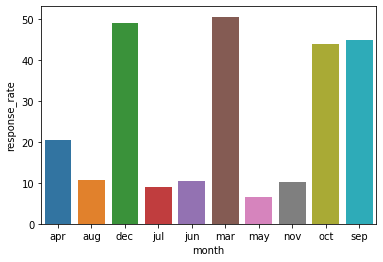

In [57]:
ax = sns.barplot(x='month', y='response_rate', data=agg_month)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the four months of december, march, october and september appear to be the best to contact the potential customers. However, please note that these our months have the fewest data entries as well, so it is not certain, how well it would behave when calls are made at a high volume.

### 3. Day of week

In [58]:
loan['day_of_week'].value_counts()

thu    8623
mon    8514
wed    8134
tue    8090
fri    7827
Name: day_of_week, dtype: int64

In [59]:
count_prospects_day = loan.groupby('day_of_week')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_day = loan.groupby('day_of_week')['response'].count().reset_index(name = 'No_of_prospects')

agg_day = count_prospects_day.merge(No_of_prospect_day, on = 'day_of_week')

agg_day['response_rate'] = 100*(agg_day['count_prospects']/agg_day['No_of_prospects']).round(4)

agg_day

,day_of_week,count_prospects,No_of_prospects,response_rate
0,fri,846,7827,10.81
1,mon,847,8514,9.95
2,thu,1045,8623,12.12
3,tue,953,8090,11.78
4,wed,949,8134,11.67


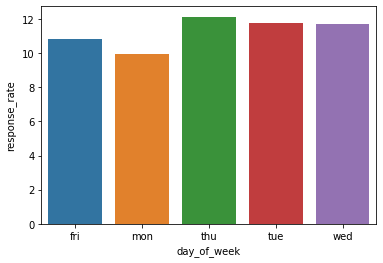

In [60]:
ax = sns.barplot(x='day_of_week', y='response_rate', data=agg_day)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

#### 4. Duration of call

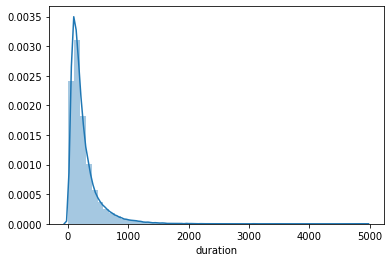

In [61]:
sns.distplot(loan['duration'])
plt.show()

In [62]:
#As we know that this is a continuos variable, we will create a box plot

loan['duration'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean       258.285010
std        259.279249
min          0.000000
25%        102.000000
50%        180.000000
75%        319.000000
95%        752.650000
99%       1271.130000
max       4918.000000
Name: duration, dtype: float64

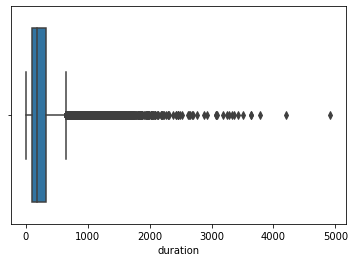

In [63]:
sns.boxplot(x='duration', data=loan)
plt.show()

In [64]:
#Since less than one percent of entires have duration greater than 1271, we can assume all entries with duration greater than 1271 as having duration as 1271.

loan['duration'][loan['duration']>1271] =1271

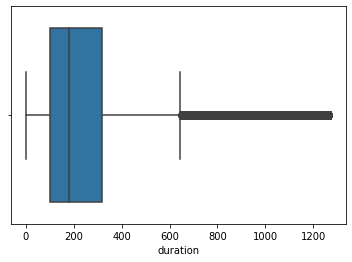

In [65]:
sns.boxplot(x='duration', data=loan)
plt.show()

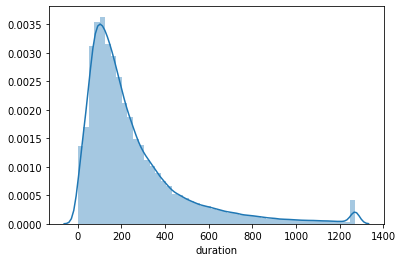

In [66]:
sns.distplot(loan['duration'])
plt.show()

Now will look into the campaign data given
- Campaign: number of contacts performed during this campaign and for this client
- Pdays: number of days that passed by after the client was last contacted from a previous campaign
- Previous: number of contacts performed before this campaign and for this client
- Poutcome: outcome of the previous marketing campaign

In [67]:
loan['campaign'].value_counts()

1     17642
2     10570
3      5341
4      2651
5      1599
6       979
7       629
8       400
9       283
10      225
11      177
12      125
13       92
14       69
17       58
15       51
16       51
18       33
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
25        8
26        8
28        8
30        7
31        7
35        5
33        4
32        4
34        3
40        2
42        2
43        2
37        1
39        1
41        1
56        1
Name: campaign, dtype: int64

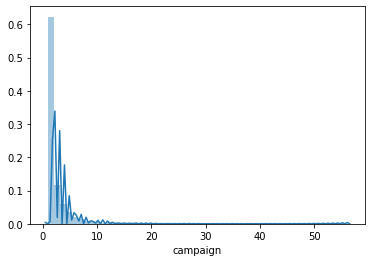

In [68]:
sns.distplot(loan['campaign'])
plt.show()

In [69]:
# We will create a box plot

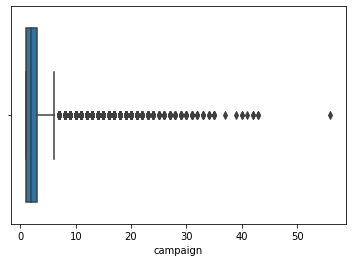

In [70]:
sns.boxplot(x='campaign', data=loan)
plt.show()

In [71]:
loan['campaign'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         2.567593
std          2.770014
min          1.000000
25%          1.000000
50%          2.000000
75%          3.000000
95%          7.000000
99%         14.000000
max         56.000000
Name: campaign, dtype: float64

Once again, we can merga all data entries with contacts greater than 14 as having campaign contact as 14

In [72]:
loan['campaign'][loan['campaign']>14] =14

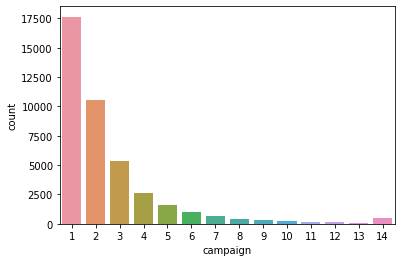

In [73]:
sns.countplot(loan['campaign'])
plt.show()

In [74]:
count_prospects_campaign = loan.groupby('campaign')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_campaign = loan.groupby('campaign')['response'].count().reset_index(name = 'No_of_prospects')

agg_campaign = count_prospects_campaign.merge(No_of_prospect_campaign, on = 'campaign')

agg_campaign['response_rate'] = 100*(agg_campaign['count_prospects']/agg_campaign['No_of_prospects']).round(4)

agg_campaign

,campaign,count_prospects,No_of_prospects,response_rate
0,1,2300,17642,13.04
1,2,1211,10570,11.46
2,3,574,5341,10.75
3,4,249,2651,9.39
4,5,120,1599,7.50
5,6,75,979,7.66
6,7,38,629,6.04
7,8,17,400,4.25
8,9,17,283,6.01
9,10,12,225,5.33


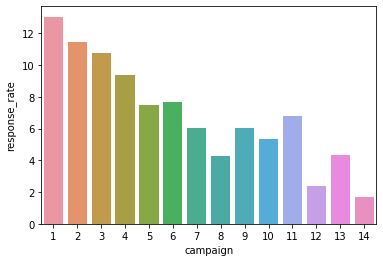

In [75]:
ax = sns.barplot(x='campaign', y='response_rate', data=agg_campaign)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

Interesting to note, that the response rate gradually decreases as the number of campaign contacts increases.

#### Gap after the last contact

In [76]:
loan['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

We are going to divide the pdays into three buckets, that is contacted within the first ten days, contacted after first ten days and first time contacted. Note that the pdays value of 999 means client was bot previously contacted.

In [77]:
loan['pdays'][loan['pdays'].isin([0,1,2,3,4,5,6,7,8,9,10])]='Contacted_in_first_10days'

loan['pdays'][loan['pdays'].isin([999])]='First_time_contacted'

loan['pdays'][~loan['pdays'].isin(['Contacted_in_first_10days','First_time_contacted'])]='Contacted_after_10days'

In [78]:
loan['pdays'].value_counts()

First_time_contacted         39673
Contacted_in_first_10days     1311
Contacted_after_10days         204
Name: pdays, dtype: int64

In [79]:
count_prospects_pdays = loan.groupby('pdays')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_pdays = loan.groupby('pdays')['response'].count().reset_index(name = 'No_of_prospects')

agg_pdays = count_prospects_pdays.merge(No_of_prospect_pdays, on = 'pdays')

agg_pdays['response_rate'] = 100*(agg_pdays['count_prospects']/agg_pdays['No_of_prospects']).round(4)

agg_pdays

,pdays,count_prospects,No_of_prospects,response_rate
0,Contacted_after_10days,116,204,56.86
1,Contacted_in_first_10days,851,1311,64.91
2,First_time_contacted,3673,39673,9.26


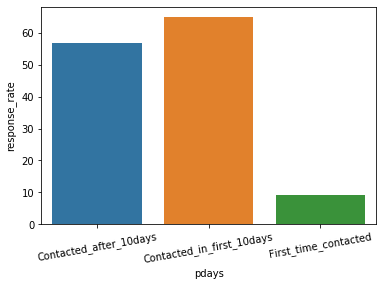

In [80]:
ax = sns.barplot(x='pdays', y='response_rate', data=agg_pdays)
ax.set_xticklabels(ax.get_xticklabels(),rotation=10)
plt.show()

Though there is a huge difference in the response rates of the three categories, it is important to note that there is also a huge difference in the volume of data entries in these categories

#### Previous

In [81]:
loan['previous'].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

Since the data ranges from 0 to 7, we are going to break it into three categories, that is never contacted, contacted less than three times and contacted greater than three times

In [82]:
loan['previous'][loan['previous'].isin([0])]='Never contacted'
loan['previous'][loan['previous'].isin([1,2,3])]='Less_than_3_times'
loan['previous'][loan['previous'].isin([4,5,6,7])]='More than_3_times'

In [83]:
loan['previous'].value_counts()

Never contacted      35563
Less_than_3_times     5531
More than_3_times       94
Name: previous, dtype: int64

In [84]:
count_prospects_previous = loan.groupby('previous')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_previous = loan.groupby('previous')['response'].count().reset_index(name = 'No_of_prospects')

agg_previous = count_prospects_previous.merge(No_of_prospect_previous, on = 'previous')

agg_previous['response_rate'] = 100*(agg_previous['count_prospects']/agg_previous['No_of_prospects']).round(4)

agg_previous

,previous,count_prospects,No_of_prospects,response_rate
0,Less_than_3_times,1445,5531,26.13
1,More than_3_times,54,94,57.45
2,Never contacted,3141,35563,8.83


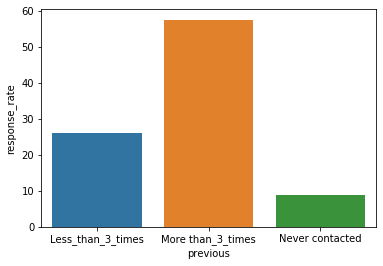

In [85]:
ax = sns.barplot(x='previous', y='response_rate', data=agg_previous)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

We can note that the response rate is greatest for the the potential customers having previous contact of more than three. However, please note that  the number of data entries is very low for such cases, hence it's difficult to draw any inferences.

Now that we have analysed all the client related information, we will move to the wider social and economic variables, which gives us a clue of the conditions when a client is more likely to buy the product.

- emp.var.rate: Employment Variation Rate - Quarterly Indicator
- cons.price.idx: Consumer Price Index - Monthly Indicator 
- cons.conf.idx: Consumer Confidence Index - Monthly Indicator 
- euribor3m: Euribor 3 Month Rate - Daily Indicator
- nr.employed: Number of Employees - Quarterly Indicator



In [86]:
loan.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'], dtype='object')

#### Employment Variation Rate

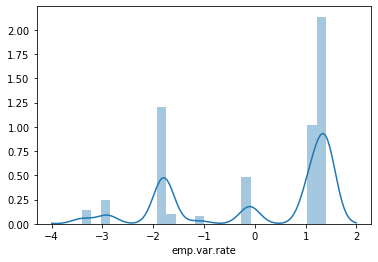

In [87]:
sns.distplot(loan['emp.var.rate'])
plt.show()

In [88]:
loan['emp.var.rate'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         0.081886
std          1.570960
min         -3.400000
25%         -1.800000
50%          1.100000
75%          1.400000
95%          1.400000
99%          1.400000
max          1.400000
Name: emp.var.rate, dtype: float64

In [89]:
loan['emp.var.rate'].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

In [90]:
count_prospects_emp_var_rate = loan.groupby('emp.var.rate')['response'].sum().reset_index(name = 'count_prospects')

No_of_prospect_emp_var_rate = loan.groupby('emp.var.rate')['response'].count().reset_index(name = 'No_of_prospects')

agg_emp_var_rate = count_prospects_emp_var_rate.merge(No_of_prospect_emp_var_rate, on = 'emp.var.rate')

agg_emp_var_rate['response_rate'] = 100*(agg_emp_var_rate['count_prospects']/agg_emp_var_rate['No_of_prospects']).round(4)

agg_emp_var_rate

,emp.var.rate,count_prospects,No_of_prospects,response_rate
0,-3.4,454,1071,42.39
1,-3.0,88,172,51.16
2,-2.9,594,1663,35.72
3,-1.8,1461,9184,15.91
4,-1.7,403,773,52.13
5,-1.1,301,635,47.40
6,-0.2,1,10,10.00
7,-0.1,232,3683,6.30
8,1.1,240,7763,3.09
9,1.4,866,16234,5.33


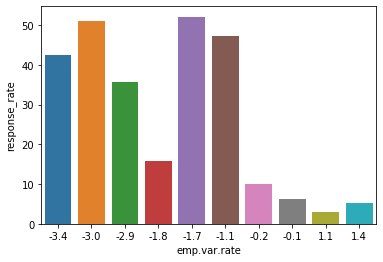

In [91]:
ax = sns.barplot(x='emp.var.rate', y='response_rate', data=agg_emp_var_rate)
ax.set_xticklabels(ax.get_xticklabels(),rotation=0)
plt.show()

You can note that a negative employment variation rate seems to be related to higher response rates.

#### Consumer Price Index

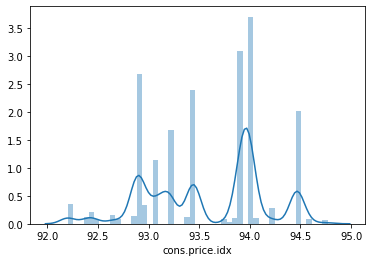

In [92]:
sns.distplot(loan['cons.price.idx'])
plt.show()

In [93]:
loan['cons.price.idx'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean        93.575664
std          0.578840
min         92.201000
25%         93.075000
50%         93.749000
75%         93.994000
95%         94.465000
99%         94.465000
max         94.767000
Name: cons.price.idx, dtype: float64

In [94]:
loan['cons.conf.idx'].value_counts()

-36.4    7763
-42.7    6685
-46.2    5794
-36.1    5175
-41.8    4374
-42.0    3616
-47.1    2458
-31.4     770
-40.8     715
-26.9     447
-30.1     357
-40.3     311
-37.5     303
-50.0     282
-29.8     267
-34.8     264
-38.3     233
-39.8     229
-40.0     212
-49.5     204
-33.6     178
-34.6     174
-33.0     172
-50.8     128
-40.4      67
-45.9      10
Name: cons.conf.idx, dtype: int64

In [95]:
#### Euribor three month rate

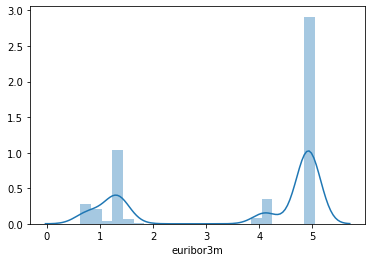

In [96]:
sns.distplot(loan['euribor3m'])
plt.show()

In [97]:
loan['euribor3m'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean         3.621291
std          1.734447
min          0.634000
25%          1.344000
50%          4.857000
75%          4.961000
95%          4.966000
99%          4.968000
max          5.045000
Name: euribor3m, dtype: float64

#### Number of employeees

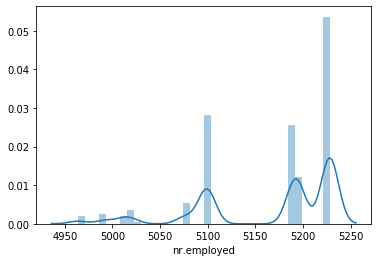

In [98]:
sns.distplot(loan['nr.employed'])
plt.show()

In [99]:
loan['nr.employed'].value_counts()

5228.1    16234
5099.1     8534
5191.0     7763
5195.8     3683
5076.2     1663
5017.5     1071
4991.6      773
5008.7      650
4963.6      635
5023.5      172
5176.3       10
Name: nr.employed, dtype: int64

In [100]:
loan['nr.employed'].describe(percentiles = [0.25,0.50,0.75,0.95,0.99])

count    41188.000000
mean      5167.035911
std         72.251528
min       4963.600000
25%       5099.100000
50%       5191.000000
75%       5228.100000
95%       5228.100000
99%       5228.100000
max       5228.100000
Name: nr.employed, dtype: float64

### Adding prospect_id to the dataframe for future use

In [101]:
loan.insert(0,'prospect_id',range(0,0+len(loan)))

In [102]:
loan.head()

,prospect_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,age_bins
0,0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,261,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
1,1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,149,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"
2,2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,226,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
3,3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,151,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(30.0, 40.0]"
4,4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,307,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,"(50.0, 60.0]"


## Data Preparation for modeling

In [103]:
# inspect the columns
loan.columns

Index(['prospect_id', 'age', 'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays', 'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'response', 'age_bins'], dtype='object')

In [104]:
# Droping the column age_bins we had created for the purpose of data exploration

loan.drop(columns = 'age_bins', inplace = True)

In [105]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
prospect_id       41188 non-null int32
age               41188 non-null int64
job               41188 non-null object
marital           41188 non-null object
education         41188 non-null object
default           41188 non-null object
housing           41188 non-null object
loan              41188 non-null object
contact           41188 non-null object
month             41188 non-null object
day_of_week       41188 non-null object
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null object
previous          41188 non-null object
poutcome          41188 non-null object
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 non-null int64
dtypes: flo

###### Converting the object datatype into category

In [106]:
for col in loan.select_dtypes(include = ['object']).columns:
    loan = loan.astype({col:'category'})

In [107]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
prospect_id       41188 non-null int32
age               41188 non-null int64
job               41188 non-null category
marital           41188 non-null category
education         41188 non-null category
default           41188 non-null category
housing           41188 non-null category
loan              41188 non-null category
contact           41188 non-null category
month             41188 non-null category
day_of_week       41188 non-null category
duration          41188 non-null int64
campaign          41188 non-null int64
pdays             41188 non-null category
previous          41188 non-null category
poutcome          41188 non-null category
emp.var.rate      41188 non-null float64
cons.price.idx    41188 non-null float64
cons.conf.idx     41188 non-null float64
euribor3m         41188 non-null float64
nr.employed       41188 non-null float64
response          41188 no

In [108]:
# Creating a dummy variable for the variable 'job' and dropping the first one.

job = pd.get_dummies(loan['job'],prefix='job',drop_first=True)

#Adding the results to the master dataframe

loan = pd.concat([loan,job],axis=1)

In [109]:
loan.head()

,prospect_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown
0,0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,261,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0
1,1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,149,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
2,2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,226,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0
3,3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,151,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0
4,4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,307,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0


##### Creating dummy variables for all categorical columns 

In [110]:
# Creating dummy variable for marital column
marital = pd.get_dummies(loan['marital'],prefix='marital',drop_first=True)
loan = pd.concat([loan,marital],axis=1)

In [111]:
# Creating dummy variable for education column

education = pd.get_dummies(loan['education'],prefix='education',drop_first=True)
loan = pd.concat([loan,education],axis=1)

In [112]:
# Creating dummy variable for default column

default = pd.get_dummies(loan['default'],prefix='default',drop_first=True)
loan = pd.concat([loan,default],axis=1)

In [113]:
# Creating dummy variable for housing column

housing = pd.get_dummies(loan['housing'],prefix='housing',drop_first=True)
loan = pd.concat([loan,housing],axis=1)

In [114]:
# Creating dummy variable for loan column

loan_v= pd.get_dummies(loan['loan'],prefix='loan',drop_first=True)
loan = pd.concat([loan,loan_v],axis=1)

In [115]:
# Creating dummy variable for contact column

contact = pd.get_dummies(loan['contact'],prefix='contact',drop_first=True)
loan = pd.concat([loan,contact],axis=1)

In [116]:
# Creating dummy variable for month column

month = pd.get_dummies(loan['month'],prefix='month',drop_first=True)
loan = pd.concat([loan,month],axis=1)

In [117]:
# Creating dummy variable for day_of_week column

day_of_week = pd.get_dummies(loan['day_of_week'],prefix='day_of_week',drop_first=True)
loan = pd.concat([loan,day_of_week],axis=1)

In [118]:
# Creating dummy variable for pdays column

pdays = pd.get_dummies(loan['pdays'],prefix='pdays',drop_first=True)
loan = pd.concat([loan,pdays],axis=1)

In [119]:
# Creating dummy variable for previous column

previous = pd.get_dummies(loan['previous'],prefix='previous',drop_first=True)
loan = pd.concat([loan,previous],axis=1)

In [120]:
# Creating dummy variable for poutcome column

poutcome = pd.get_dummies(loan['poutcome'],prefix='poutcome',drop_first=True)
loan = pd.concat([loan,poutcome],axis=1)

In [121]:
# check the dataframe
loan.head()

,prospect_id,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,0,56,housemaid,married,Primary_Education,no,no,no,telephone,may,mon,261,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,57,services,married,Secondary_Education,unknown,no,no,telephone,may,mon,149,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
2,2,37,services,married,Secondary_Education,no,yes,no,telephone,may,mon,226,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,3,40,admin.,married,Primary_Education,no,no,no,telephone,may,mon,151,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
4,4,56,services,married,Secondary_Education,no,no,yes,telephone,may,mon,307,1,First_time_contacted,Never contacted,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0


In [122]:
# Drop all the columns for which dummy variables are created
loan.drop(columns = ['job','marital','education','default','housing','loan','contact','month','day_of_week','pdays','previous','poutcome'], inplace=True)

In [123]:
loan.head()

,prospect_id,age,duration,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,response,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
0,0,56,261,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
1,1,57,149,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
2,2,37,226,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
3,3,40,151,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0
4,4,56,307,1,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0


In [124]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 53 columns):
prospect_id                        41188 non-null int32
age                                41188 non-null int64
duration                           41188 non-null int64
campaign                           41188 non-null int64
emp.var.rate                       41188 non-null float64
cons.price.idx                     41188 non-null float64
cons.conf.idx                      41188 non-null float64
euribor3m                          41188 non-null float64
nr.employed                        41188 non-null float64
response                           41188 non-null int64
job_blue-collar                    41188 non-null uint8
job_entrepreneur                   41188 non-null uint8
job_housemaid                      41188 non-null uint8
job_management                     41188 non-null uint8
job_retired                        41188 non-null uint8
job_self-employed                  41188 

In [125]:
# Adding feature variables to X
X = loan.drop(['response'],axis=1)

# Adding response variable to y
y = loan['response']

##### Splitting the data into train and test and we will drop the duration and prospect id after conversion into train and test

In [126]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.7,test_size=0.3,random_state=100)

##### Creating a back up data frame for the prospect id and the duration for future use 

In [127]:
X_test_pros_dur = X_test.loc[:,['prospect_id','duration']]

In [128]:
X_test_pros_dur

,prospect_id,duration
33148,33148,52
27585,27585,407
15722,15722,177
40349,40349,187
2576,2576,165
...,...,...
35346,35346,172
17896,17896,597
33711,33711,161
39853,39853,713


In [129]:
X_test.shape

(12357, 52)

#### Drop the duration column and prospect_id from the X_train and X_test for modeling

In [130]:
X_train.drop(columns = ['prospect_id','duration'],inplace = True)

In [131]:
X_test.drop(columns = ['prospect_id','duration'],inplace = True)

In [132]:
# Inspect the X_train columns
X_train.columns

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_Secondary_Education', 'education_Tertiary_Education', 'education_professional.course', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pdays_Contacted_in_first_10days', 'pdays_First_time_contacted', 'previous_More than_3_times', 'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success'], dtype='object')

In [133]:
# Inspect the X_test.columns
X_test.columns

Index(['age', 'campaign', 'emp.var.rate', 'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed', 'job_blue-collar', 'job_entrepreneur', 'job_housemaid', 'job_management', 'job_retired', 'job_self-employed', 'job_services', 'job_student', 'job_technician', 'job_unemployed', 'job_unknown', 'marital_married', 'marital_single', 'education_Secondary_Education', 'education_Tertiary_Education', 'education_professional.course', 'education_unknown', 'default_unknown', 'default_yes', 'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes', 'contact_telephone', 'month_aug', 'month_dec', 'month_jul', 'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct', 'month_sep', 'day_of_week_mon', 'day_of_week_thu', 'day_of_week_tue', 'day_of_week_wed', 'pdays_Contacted_in_first_10days', 'pdays_First_time_contacted', 'previous_More than_3_times', 'previous_Never contacted', 'poutcome_nonexistent', 'poutcome_success'], dtype='object')

#### Standardisation of numerical features because some features has high range and low range values and to put them in same range, standardisation is necessary for modeling

In [134]:
X_train.head()

,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success
7019,31,4,1.1,93.994,-36.4,4.860,5191.0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0
27175,51,3,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0
15817,39,3,1.4,93.918,-42.7,4.960,5228.1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0
40971,68,4,-1.1,94.601,-49.5,1.000,4963.6,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0
8467,37,3,1.4,94.465,-41.8,4.864,5228.1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0


###### Standardisation//Scaling numerical features for X_train

In [135]:
X_train_df = X_train[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [136]:
std_X_train_df=(X_train_df-X_train_df.mean())/X_train_df.std()

In [137]:
X_train = X_train.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [138]:
X_train = pd.concat([X_train,std_X_train_df],axis=1)

In [139]:
X_train.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
7019,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,1,0,-0.878685,0.646930,0.649758,0.723298,0.891826,0.715448,0.333618
27175,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,1.088841,0.213946,-0.114599,-0.650827,-0.319720,0.231937,0.400051
15817,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,-0.091675,0.213946,0.840847,0.591769,-0.471164,0.773077,0.847088
40971,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,2.761237,0.646930,-0.751563,1.773794,-1.942327,-1.509050,-2.813633
8467,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,1,0,-0.288427,0.213946,0.840847,1.538427,-0.276451,0.717753,0.847088


###### Standardisation numerical features for X_test

In [140]:
X_test_df = X_test[['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed']]

In [141]:
std_X_test_df=(X_test_df-X_test_df.mean())/X_test_df.std()

In [142]:
X_test = X_test.drop(['age','campaign','emp.var.rate','cons.price.idx','cons.conf.idx','euribor3m','nr.employed'], 1)

In [143]:
X_test = pd.concat([X_test,std_X_test_df],axis=1)

In [144]:
X_test.head()

,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_Secondary_Education,education_Tertiary_Education,education_professional.course,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,pdays_Contacted_in_first_10days,pdays_First_time_contacted,previous_More than_3_times,previous_Never contacted,poutcome_nonexistent,poutcome_success,age,campaign,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
33148,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,-1.185515,-0.651460,-1.199007,-1.172918,-1.237193,-1.348603,-0.944859
27585,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,1,0,0.101344,0.663413,-0.118526,-0.644728,-0.332420,0.226981,0.393573
15722,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1,1,0,-0.591580,-0.651460,0.834840,0.590583,-0.483215,0.768913,0.840640
40349,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,-1.185515,-0.213169,-1.135450,0.778116,0.464642,-1.574841,-2.432774
2576,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,1,1,0,1.487193,-0.213169,0.644167,0.721340,0.873944,0.708890,0.327136


### Modelling

#### Logistic Regression

In [145]:
# Import logistic Regression from sklearn
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import statsmodels.api as sm

In [146]:
# Add Constant
X_train_sm = sm.add_constant(X_train)

In [147]:
# Cteating instance of logistic regresson
logreg = LogisticRegression()
logreg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [148]:
# Logistic regression model
logm1 = sm.GLM(y_train,X_train_sm, family = sm.families.Binomial())
logm1.fit().summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:               response   No. Observations:                28831
Model:                            GLM   Df Residuals:                    28782
Model Family:                Binomial   Df Model:                           48
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -7933.3
Date:                Mon, 06 Apr 2020   Deviance:                       15867.
Time:                        18:20:40   Pearson chi2:                 2.92e+04
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
===================================================================================================
                                      coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const                              -1.6434      0.284     -5.776      0.000      -2.201      -1.086
job_blue-collar                    -0.1548      0.083     -1.874      0.061      -0.317       0.007
job_entrepreneur                   -0.2346      0.132     -1.775      0.076      -0.494       0.024
job_housemaid                       0.0300      0.148      0.203      0.839      -0.259       0.319
job_management                     -0.1549      0.092     -1.689      0.091      -0.335       0.025
job_retired                         0.2297      0.110      2.091      0.036       0.014       0.445
job_self-employed                  -0.0586      0.121     -0.482      0.630      -0.297       0.179
job_services                       -0.0574      0.088     -0.650      0.516      -0.230       0.116
job_student                         0.2773      0.120      2.320      0.020       0.043       0.512
job_technician                     -0.0158      0.075     -0.211      0.833      -0.162       0.131
job_unemployed                     -0.0249      0.134     -0.186      0.853      -0.288       0.238
job_unknown                        -0.0974      0.241     -0.405      0.686      -0.569       0.374
marital_married                     0.0544      0.072      0.759      0.448      -0.086       0.195
marital_single                      0.1177      0.082      1.438      0.150      -0.043       0.278
education_Secondary_Education       0.0321      0.072      0.445      0.657      -0.109       0.173
education_Tertiary_Education        0.1212      0.073      1.661      0.097      -0.022       0.264
education_professional.course       0.0773      0.086      0.900      0.368      -0.091       0.246
education_unknown                   0.1811      0.109      1.664      0.096      -0.032       0.394
default_unknown                    -0.2784      0.070     -4.001      0.000      -0.415      -0.142
default_yes                       -17.5533   1.25e+04     -0.001      0.999   -2.45e+04    2.45e+04
housing_unknown                    -0.0493      0.071     -0.693      0.488      -0.189       0.090
housing_yes                        -0.0349      0.043     -0.809      0.419      -0.120       0.050
loan_unknown                       -0.0493      0.071     -0.693      0.488      -0.189       0.090
loan_yes                            0.0120      0.059      0.203      0.839      -0.104       0.128
contact_telephone                  -0.6339      0.079     -8.055      0.000      -0.788      -0.480
month_aug                           0.4285      0.128      3.347      0.001       0.178       0.680
month_dec                           0.2897      0.226      1.283      0.200      -0.153       0.732
month_jul                          -0.0149      0.100     -0.149      0.881      -0

#### Principal Component Analysis

In [149]:
## initialize model
#pca = PCA()
pca = PCA(svd_solver = 'randomized' , random_state = 42)

In [150]:
# Train the model
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

In [151]:
pca.components_

array([[-1.36715291e-02, -6.97205665e-04, -3.49050599e-03, ...,
        -1.29869815e-01, -5.12757763e-01, -4.76832955e-01],
       [-2.89371695e-02,  1.59053131e-03,  1.15417420e-02, ...,
         6.00844449e-01,  2.85812856e-02, -7.00551919e-02],
       [ 2.19635764e-02,  5.09548198e-03,  6.71845495e-03, ...,
        -3.56559182e-01, -8.43277028e-02, -2.49531509e-02],
       ...,
       [-5.47383883e-05,  9.51827341e-06, -4.59416957e-06, ...,
         3.04024716e-05, -1.52963964e-04,  1.08212868e-04],
       [ 0.00000000e+00, -4.97807026e-16,  3.59918507e-16, ...,
         5.68591830e-17, -4.73081453e-16, -3.35333468e-16],
       [-0.00000000e+00, -8.77989249e-17,  7.26488422e-17, ...,
         3.60679756e-17, -1.06266111e-16,  8.22096962e-17]])

In [152]:
pca.explained_variance_ratio_

array([3.28014005e-01, 1.07824080e-01, 8.84410676e-02, 8.16348196e-02,
       5.74968377e-02, 3.30851480e-02, 2.58679156e-02, 2.35395211e-02,
       2.22870155e-02, 1.94586207e-02, 1.88692692e-02, 1.84252728e-02,
       1.81469421e-02, 1.75632420e-02, 1.63804362e-02, 1.47924926e-02,
       1.25797753e-02, 1.14001253e-02, 1.04800789e-02, 7.40738177e-03,
       7.14373552e-03, 5.85076373e-03, 5.21706659e-03, 5.09070855e-03,
       4.58118580e-03, 4.07875914e-03, 3.98032717e-03, 3.91717885e-03,
       3.42062505e-03, 3.10623552e-03, 2.96227600e-03, 2.65802305e-03,
       2.48064418e-03, 2.18865494e-03, 1.68424335e-03, 1.64680992e-03,
       1.40114159e-03, 1.16157585e-03, 1.11621511e-03, 6.26340740e-04,
       5.87693564e-04, 3.52463714e-04, 3.16948235e-04, 2.83194841e-04,
       1.88816869e-04, 1.37491505e-04, 1.20635952e-04, 6.19760630e-06,
       1.64682201e-33, 1.64682201e-33])

In [153]:
pd.Series(np.round(pca.explained_variance_ratio_.cumsum(), 4)*100)

0      32.80
1      43.58
2      52.43
3      60.59
4      66.34
5      69.65
6      72.24
7      74.59
8      76.82
9      78.76
10     80.65
11     82.49
12     84.31
13     86.07
14     87.70
15     89.18
16     90.44
17     91.58
18     92.63
19     93.37
20     94.08
21     94.67
22     95.19
23     95.70
24     96.16
25     96.57
26     96.96
27     97.36
28     97.70
29     98.01
30     98.30
31     98.57
32     98.82
33     99.04
34     99.21
35     99.37
36     99.51
37     99.63
38     99.74
39     99.80
40     99.86
41     99.89
42     99.93
43     99.95
44     99.97
45     99.99
46    100.00
47    100.00
48    100.00
49    100.00
dtype: float64

##### Here, we can see that using 16 components, we can achieve approximatly 90%, So will choose 16 PCA components for model building

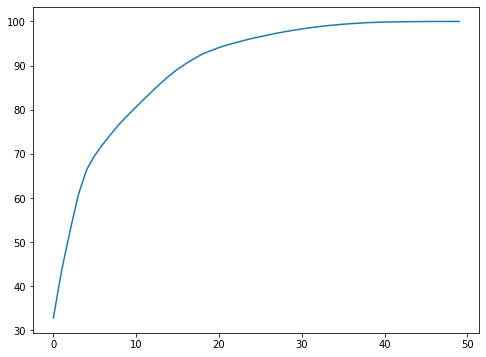

In [154]:
## PCA cumulative 
%matplotlib inline
features = range(pca.n_components_)
cumulative_variance = np.round(np.cumsum(pca.explained_variance_ratio_)*100, decimals=4)
plt.figure(figsize = (8,6))
plt.plot(cumulative_variance)

In [155]:
# Apply PCA using 16 PCA variables
pca_model = [("pca", PCA(n_components=16)),
         ("logistic", LogisticRegression(class_weight='balanced'))
        ]
pipeline = Pipeline(pca_model)

In [156]:
# Apply model and fit it on X_train and Y_train
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('pca',
                 PCA(copy=True, iterated_power='auto', n_components=16,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False)),
                ('logistic',
                 LogisticRegression(C=1.0, class_weight='balanced', dual=False,
                                    fit_intercept=True, intercept_scaling=1,
                                    l1_ratio=None, max_iter=100,
                                    multi_class='warn', n_jobs=None,
                                    penalty='l2', random_state=None,
                                    solver='warn', tol=0.0001, verbose=0,
                                    warm_start=False))],
         verbose=False)

In [157]:
# score of train dataset usinf PCA
pipeline.score(X_train, y_train)

0.815753876036211

In [158]:
# Predict response
y_pred = pipeline.predict(X_test)

In [159]:
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[9150, 1825],
       [ 535,  847]], dtype=int64)

In [160]:
TP = cm[1,1] # true positive
TN = cm[0,0] # true negatives
FP = cm[0,1] # false positives
FN = cm[1,0] # false negatives

In [161]:
# Sensitvity
TP / float(TP+FN)

0.6128798842257598

In [162]:
# Specificity
TN / float(TN+FP)

0.8337129840546698

In [163]:
# check area under curve
y_pred_prob = pipeline.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.78


In [164]:
# class imbalance
y_train.value_counts()/y_train.shape

0    0.886997
1    0.113003
Name: response, dtype: float64

##### Here, we can see that the data is very much imbalance and we need to use the balanced logistic regression and  hypermeter of k-fold gridcv to fit the model to avoid the overfitting

In [165]:
# PCA
pca = PCA()

# logistic regression - the class weight is balanced
logistic = LogisticRegression(class_weight='balanced')

# create pipeline
pca_model = [("pca", pca),
         ("logistic", logistic)
        ]
pca_logistic = Pipeline(pca_model)

# hyperparameter space
params = {'pca__n_components': [16,17,18,19,20], 'logistic__C': [0.1, 0.5, 1, 2, 3, 4, 5, 10], 'logistic__penalty': ['l1', 'l2']}

# create 5 folds
folds = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 4)

# create gridsearch object
model = GridSearchCV(estimator=pca_logistic, cv=folds, param_grid=params, scoring='roc_auc')

In [166]:
# fit model
model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=4, shuffle=True),
             error_score='raise-deprecating',
             estimator=Pipeline(memory=None,
                                steps=[('pca',
                                        PCA(copy=True, iterated_power='auto',
                                            n_components=None,
                                            random_state=None,
                                            svd_solver='auto', tol=0.0,
                                            whiten=False)),
                                       ('logistic',
                                        LogisticRegression(C=1.0,
                                                           class_weight='balanced',
                                                           dual=False,
                                                           fit_intercept=Tr...
                                                           multi_class='warn',
                    

In [167]:
# Check Hyperparameters
print("AUC: ", model.best_score_)
print("Hyperparameters: ", model.best_params_)

AUC:  0.7846814371755196
Hyperparameters:  {'logistic__C': 5, 'logistic__penalty': 'l2', 'pca__n_components': 18}


In [168]:
# Predict the Response
y_pred = model.predict(X_test)

In [169]:
# create onfusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[9150, 1825],
       [ 537,  845]], dtype=int64)

In [170]:
# check area under curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
print("AUC: ", round(roc_auc_score(y_test, y_pred_prob),2))

AUC:  0.78


##### Predict the prediction probability on test data

In [171]:
y_prob = model.predict_proba(X_test)

In [172]:
# Check the shape
y_prob.shape

(12357, 2)

In [173]:
y_prob[:,1]
y_test.head()

33148    0
27585    0
15722    0
40349    1
2576     0
Name: response, dtype: int64

##### Creating Dataframe for probablities,prediction response and response_actual response

In [174]:
pred_probab_df = pd.DataFrame()

In [175]:
pred_probab_df['prob'] = y_prob[:,1]

In [176]:
pred_probab_df['response_actual'] = np.array(y_test)

In [177]:
pred_probab_df['pred'] = np.array(y_pred)

In [178]:
pred_probab_df.head()

,prob,response_actual,pred
0,0.510091,0,1
1,0.337151,0,0
2,0.295251,0,0
3,0.931840,1,1
4,0.203602,0,0


##### inspect the classfication report

In [179]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.94      0.83      0.89     10975
           1       0.32      0.61      0.42      1382

    accuracy                           0.81     12357
   macro avg       0.63      0.72      0.65     12357
weighted avg       0.87      0.81      0.83     12357



In [180]:
probab = pred_probab_df

In [181]:
val = [float(x)/10 for x in range(10)]
for i in val:
    probab[i]= probab.prob.map(lambda x: 1 if x > i else 0)

In [182]:
probab

,prob,response_actual,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.510091,0,1,1,1,1,1,1,1,0,0,0,0
1,0.337151,0,0,1,1,1,1,0,0,0,0,0,0
2,0.295251,0,0,1,1,1,0,0,0,0,0,0,0
3,0.931840,1,1,1,1,1,1,1,1,1,1,1,1
4,0.203602,0,0,1,1,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
12352,0.492096,0,0,1,1,1,1,1,0,0,0,0,0
12353,0.334378,0,0,1,1,1,1,0,0,0,0,0,0
12354,0.501815,0,1,1,1,1,1,1,1,0,0,0,0
12355,0.892941,1,1,1,1,1,1,1,1,1,1,1,0


In [183]:
confusion = metrics.confusion_matrix(probab.response_actual,probab.pred)

In [184]:
confusion

array([[9150, 1825],
       [ 537,  845]], dtype=int64)

In [185]:
TP = confusion[1,1] # true positive
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [186]:
# Sensitvity
TP / float(TP+FN)

0.6114327062228654

In [187]:
# Specificity
TN / float(TN+FP)

0.8337129840546698

In [188]:
# positive predicted value
print(TP/ float(TP+FP))

0.31647940074906367


In [189]:
# negative predicted value 
print(TN / float(TN+FN))

0.9445648807680397


In [190]:
final_cutoff_df = pd.DataFrame()
total1 = sum(sum(confusion))
accuracy = (confusion[0,0] + confusion[1,1])/total1    
speci = confusion[0,0]/(confusion[0,0]+confusion[0,1])
sensi = confusion[1,1]/(confusion[1,0]+confusion[1,1])
final_cutoff_df = [accuracy,sensi,speci]
final_cutoff_df

[0.808853281540827, 0.6114327062228654, 0.8337129840546698]

In [191]:
df_cutoff = pd.DataFrame(columns = ['prob','accuracy','sensi','speci'])
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm = metrics.confusion_matrix(probab.response_actual,probab[i])
    total = sum(sum(cm))
    accuracy = (cm[0,0]+cm[1,1])/total
    speci = cm[0,0]/(cm[0,0]+cm[0,1])
    sensi = cm[1,1]/(cm[1,0]+cm[1,1])
    df_cutoff.loc[i] = [i,accuracy,sensi,speci]
df_cutoff

,prob,accuracy,sensi,speci
0.0,0.0,0.111839,1.000000,0.000000
0.1,0.1,0.112001,1.000000,0.000182
0.2,0.2,0.210569,0.975398,0.114260
0.3,0.3,0.467104,0.858900,0.417768
0.4,0.4,0.723072,0.703329,0.725558
0.5,0.5,0.808853,0.611433,0.833713
0.6,0.6,0.842680,0.569465,0.877084
0.7,0.7,0.870357,0.481910,0.919271
0.8,0.8,0.880958,0.392909,0.942415
0.9,0.9,0.895606,0.185239,0.985057


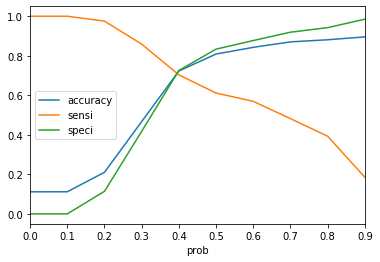

In [192]:
# Plot the cut of point
df_cutoff.plot.line(x = 'prob',y=['accuracy','sensi','speci'])
plt.show()

##### Probability cut off is around 0.4 which means that above this cut off we will recieve yes response

In [193]:
pred_probab_df['pred'] = pred_probab_df.prob.map(lambda x: 1 if x > 0.4 else 0)

In [194]:
pred_probab_df.head(100)

,prob,response_actual,pred,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0.510091,0,1,1,1,1,1,1,1,0,0,0,0
1,0.337151,0,0,1,1,1,1,0,0,0,0,0,0
2,0.295251,0,0,1,1,1,0,0,0,0,0,0,0
3,0.931840,1,1,1,1,1,1,1,1,1,1,1,1
4,0.203602,0,0,1,1,1,0,0,0,0,0,0,0
5,0.476677,1,1,1,1,1,1,1,0,0,0,0,0
6,0.353693,0,0,1,1,1,1,0,0,0,0,0,0
7,0.173372,0,0,1,1,0,0,0,0,0,0,0,0
8,0.363185,0,0,1,1,1,1,0,0,0,0,0,0
9,0.307749,0,0,1,1,1,1,0,0,0,0,0,0


### Creating cost to call dataframe

###### Here, we have concatenate the back up dataframe of X_test containes the prospect id and duration and also create a column of cost of call

In [195]:
X_test_pros_dur.reset_index(drop=True, inplace=True)
pred_probab_df.reset_index(drop=True, inplace=True)

In [196]:
df_cost_pred = pd.concat([pred_probab_df,X_test_pros_dur],axis =1)

In [197]:
df_cost_pred = df_cost_pred[['response_actual','prospect_id','prob','pred','duration']]

In [198]:
df_cost_pred.head(100)

,response_actual,prospect_id,prob,pred,duration
0,0,33148,0.510091,1,52
1,0,27585,0.337151,0,407
2,0,15722,0.295251,0,177
3,1,40349,0.931840,1,187
4,0,2576,0.203602,0,165
5,1,33359,0.476677,1,725
6,0,26890,0.353693,0,75
7,0,8032,0.173372,0,29
8,0,13180,0.363185,0,272
9,0,10102,0.307749,0,139


#### Adding column 'cost_of_call' by imputing "Re 1" for 60 seconds and used the np.ceil for rouding of the values to upper digit(float)

In [199]:
df_cost_pred['cost_of_call'] = df_cost_pred['duration'].apply(lambda x:np.ceil(x/60))

In [200]:
df_cost_pred.head()

,response_actual,prospect_id,prob,pred,duration,cost_of_call
0,0,33148,0.510091,1,52,1.0
1,0,27585,0.337151,0,407,7.0
2,0,15722,0.295251,0,177,3.0
3,1,40349,0.931840,1,187,4.0
4,0,2576,0.203602,0,165,3.0


In [201]:
df_cost_pred['cost_of_call'].sum()

58154.0

In [202]:
df_cost_pred = df_cost_pred[['response_actual','prospect_id','prob','pred','duration','cost_of_call']]

In [203]:
df_cost_pred.head(5)

,response_actual,prospect_id,prob,pred,duration,cost_of_call
0,0,33148,0.510091,1,52,1.0
1,0,27585,0.337151,0,407,7.0
2,0,15722,0.295251,0,177,3.0
3,1,40349,0.931840,1,187,4.0
4,0,2576,0.203602,0,165,3.0


###### Creating a decile dataframe 

In [204]:
decile_df = df_cost_pred

In [205]:
decile_df.head()

,response_actual,prospect_id,prob,pred,duration,cost_of_call
0,0,33148,0.510091,1,52,1.0
1,0,27585,0.337151,0,407,7.0
2,0,15722,0.295251,0,177,3.0
3,1,40349,0.931840,1,187,4.0
4,0,2576,0.203602,0,165,3.0


In [206]:
decile_df['decile'] = pd.qcut(decile_df['prob'],10, labels=np.arange(10, 0, -1))

In [207]:
decile_df.head(100)

,response_actual,prospect_id,prob,pred,duration,cost_of_call,decile
0,0,33148,0.510091,1,52,1.0,3
1,0,27585,0.337151,0,407,7.0,5
2,0,15722,0.295251,0,177,3.0,7
3,1,40349,0.931840,1,187,4.0,1
4,0,2576,0.203602,0,165,3.0,9
5,1,33359,0.476677,1,725,13.0,3
6,0,26890,0.353693,0,75,2.0,5
7,0,8032,0.173372,0,29,1.0,10
8,0,13180,0.363185,0,272,5.0,4
9,0,10102,0.307749,0,139,3.0,6


In [208]:
decile_df['decile'].value_counts()

1     1236
2     1236
4     1236
6     1236
7     1236
9     1236
10    1236
3     1235
5     1235
8     1235
Name: decile, dtype: int64

##### Here, we are creating different lift dataframes using groupby decile and will merge them on 'decile'

In [209]:
lift_df = decile_df.groupby('decile')

In [210]:
lift_df

In [211]:
lift_df1 = lift_df['duration'].mean()

In [212]:
lift_df1.reset_index()

,decile,duration
0,10,243.821197
1,9,248.843851
2,8,239.152227
3,7,249.276699
4,6,232.593042
5,5,247.040486
6,4,255.502427
7,3,255.830769
8,2,260.991909
9,1,290.783172


In [213]:
lift_df2 = decile_df.groupby('decile')['prob'].count().sort_index(ascending = False)

In [214]:
lift_df2.reset_index()

,decile,prob
0,1,1236
1,2,1236
2,3,1235
3,4,1236
4,5,1235
5,6,1236
6,7,1236
7,8,1235
8,9,1236
9,10,1236


In [215]:
lift_df = pd.merge(lift_df1,lift_df2, how="inner",on='decile')

In [216]:
lift_df.reset_index(inplace=True)

In [217]:
lift_df

,decile,duration,prob
0,10,243.821197,1236
1,9,248.843851,1236
2,8,239.152227,1235
3,7,249.276699,1236
4,6,232.593042,1236
5,5,247.040486,1235
6,4,255.502427,1236
7,3,255.830769,1235
8,2,260.991909,1236
9,1,290.783172,1236


In [218]:
lift_df.rename({'prob':'total'}, axis=1, inplace=True)

In [219]:
lift_df.head()

,decile,duration,total
0,10,243.821197,1236
1,9,248.843851,1236
2,8,239.152227,1235
3,7,249.276699,1236
4,6,232.593042,1236


In [220]:
lift_df_pred = decile_df[decile_df['response_actual']==1].groupby('decile')['response_actual'].count().sort_index(ascending = False)

In [221]:
lift_df_pred.reset_index()

,decile,response_actual
0,1,569
1,2,259
2,3,117
3,4,92
4,5,66
5,6,67
6,7,76
7,8,64
8,9,39
9,10,33


In [222]:
lift_df_prediction = decile_df[decile_df['pred']==1].groupby('decile')['pred'].count().sort_index(ascending = False)

In [223]:
lift_df_prediction

decile
1     1236
2     1236
3     1235
4      277
5        0
6        0
7        0
8        0
9        0
10       0
Name: pred, dtype: int64

In [224]:
lift_df_call_grp = decile_df.groupby('decile')

In [225]:
lift_df_call_grp

In [226]:
lift_df_pred2 = lift_df_call_grp['cost_of_call'].sum().sort_index(ascending = False)

In [227]:
lift_df_pred2

decile
1     6623.0
2     5985.0
3     5880.0
4     5887.0
5     5693.0
6     5400.0
7     5742.0
8     5547.0
9     5734.0
10    5663.0
Name: cost_of_call, dtype: float64

In [228]:
lift_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 3 columns):
decile      10 non-null category
duration    10 non-null float64
total       10 non-null int64
dtypes: category(1), float64(1), int64(1)
memory usage: 698.0 bytes


###### Final lift dataframe after merging all lift dataframes

In [229]:
lift_df_final1 = lift_df.merge(lift_df_pred,on = 'decile')

In [230]:
lift_df_final = lift_df_final1.merge(lift_df_pred2,on="decile")

In [231]:
# sorting the dataframe by decile
lift_df_final = lift_df_final.sort_values(['decile'], ascending=False)

In [232]:
# creating a column using commultative sum of response_actual response
lift_df_final['cum_resp'] = lift_df_final['response_actual'].cumsum()

In [233]:
# calculating column gain by dividing the commulative sum response by sum of response_actual response
lift_df_final['gain'] = 100*(lift_df_final['cum_resp']/sum(lift_df_final['response_actual']))

In [234]:
# Creating the column cumlift by dividing the gain feature by the decile
lift_df_final['cum_lift'] = lift_df_final['gain']/(lift_df_final['decile'].astype('int')*(100/10))

In [235]:
lift_df_final['%age of Customers'] = lift_df_final['decile'].apply(lambda x:x*10)

In [236]:
lift_df_final.rename({'duration':'average_duration'}, axis=1, inplace=True)

In [237]:
lift_df_final.rename({'cost_of_call':'total_cost'}, axis=1, inplace=True)

In [238]:
lift_df_final

,decile,average_duration,total,response_actual,total_cost,cum_resp,gain,cum_lift,%age of Customers
9,1,290.783172,1236,569,6623.0,569,41.172214,4.117221,10
8,2,260.991909,1236,259,5985.0,828,59.913169,2.995658,20
7,3,255.830769,1235,117,5880.0,945,68.379161,2.279305,30
6,4,255.502427,1236,92,5887.0,1037,75.036179,1.875904,40
5,5,247.040486,1235,66,5693.0,1103,79.811867,1.596237,50
4,6,232.593042,1236,67,5400.0,1170,84.659913,1.410999,60
3,7,249.276699,1236,76,5742.0,1246,90.159190,1.287988,70
2,8,239.152227,1235,64,5547.0,1310,94.790159,1.184877,80
1,9,248.843851,1236,39,5734.0,1349,97.612156,1.084580,90
0,10,243.821197,1236,33,5663.0,1382,100.000000,1.000000,100


##### Insights from the above lift dataframe
- We have have positive responses of approximately 80% by approaching top 50% of customers and It will reduce the cost of call. 
- If we achieve 80% gain by approaching top 50% customers, we can reduce our cost by call cost by 50% (which is around Rs. 30000)

#### Plotting the gain, cummulative lift and decile chart

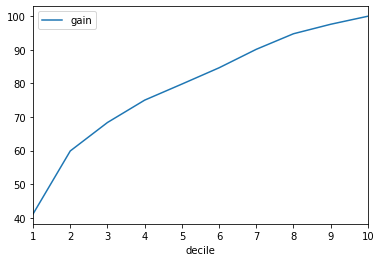

In [239]:
lift_df_final.plot.line(x='decile', y=['gain'])

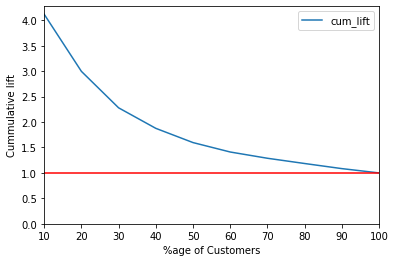

In [240]:
#fig = plt.figure(figsize = (4,4))
#ax = fig.add_subplot(111)
#ax.set(title = 'lift Chart',xlabel = 'Decile',ylabel = 'Cummulative lift')lift
lift = lift_df_final.plot.line(x='%age of Customers', y=['cum_lift'],)
lift.axhline(y=1, color='r', linestyle='-')
plt.ylim(ymin=0)
plt.ylabel('Cummulative lift')
plt.legend()
plt.show()

#### Total Call Cost of Acquisition for 80% of customer 

In [241]:
lift_df_final

,decile,average_duration,total,response_actual,total_cost,cum_resp,gain,cum_lift,%age of Customers
9,1,290.783172,1236,569,6623.0,569,41.172214,4.117221,10
8,2,260.991909,1236,259,5985.0,828,59.913169,2.995658,20
7,3,255.830769,1235,117,5880.0,945,68.379161,2.279305,30
6,4,255.502427,1236,92,5887.0,1037,75.036179,1.875904,40
5,5,247.040486,1235,66,5693.0,1103,79.811867,1.596237,50
4,6,232.593042,1236,67,5400.0,1170,84.659913,1.410999,60
3,7,249.276699,1236,76,5742.0,1246,90.159190,1.287988,70
2,8,239.152227,1235,64,5547.0,1310,94.790159,1.184877,80
1,9,248.843851,1236,39,5734.0,1349,97.612156,1.084580,90
0,10,243.821197,1236,33,5663.0,1382,100.000000,1.000000,100


##### From the dataframe, it is clear that to acquire 80% of customers, we need to approach 50% of top customers and we can calculate the total_cost by adding cost of 50% customers

In [242]:
acq_80_df = lift_df_final.head(5)

In [243]:
Cost_acq_80 = acq_80_df['total_cost'].sum()

In [244]:
Cost_acq_80

30068.0

##### Cost to acquire 80% customers is Rs.30068.0 which is approximately half of the overal cost of compaign